Author: Gopalkrishna, Sumanth (sgopalk) -- Lin, Zilong (zillin)

Reading the patient_satisfaction.txt into a DataFrame

In [ ]:
import pandas as pd
patient = pd.read_csv("patient_satisfaction.txt", sep=" "*3, header=None,engine='python')
patient.columns = ["Satisfaction", "Age", "illness", "Anxiety"]
patient_info=patient[[ "Age", "illness", "Anxiety"]]
patient_info["Satisfaction"]=patient[["Satisfaction"]]

# Question 1

### Generate scatter plots between each of the features and label. Also compute the correlation coeffcients between each feature-label pair. What do the scatter plots and correlations convey about the different relationships?

#### Plot: Age vs Satisfaction

It looks like AGE annd Satisfaction seem to be negatively correlated with each other, in which one varible increases and the other decreases.
The negative correlation is pretty strong with a -0.78 value.

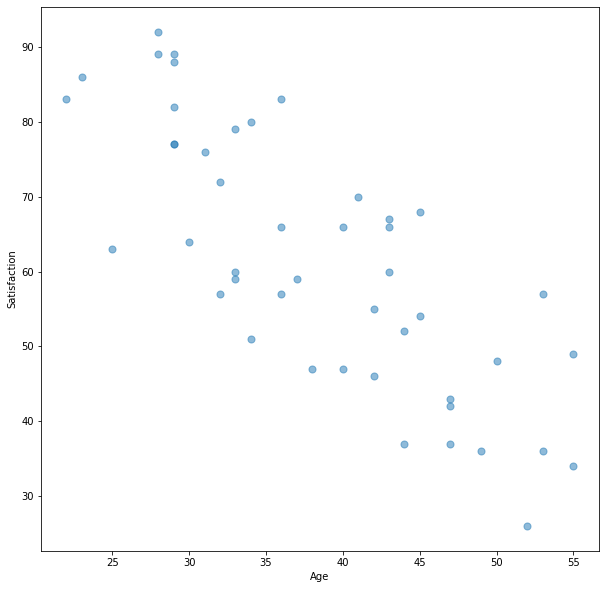

Correlation b/w Age and Satisfaction = -0.7867555223803775


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.scatter(patient_info["Age"],patient_info["Satisfaction"],s=50,alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Satisfaction")
plt.show()
print("Correlation b/w Age and Satisfaction =",patient_info["Age"].corr(patient_info["Satisfaction"]))

#### Plot: Anxiety vs Satisfaction

It looks like Anxiety annd Satisfaction seem to be negatively correlated with each other, in which one varible increases and the other decreases.
Correlation coefficient : -0.644

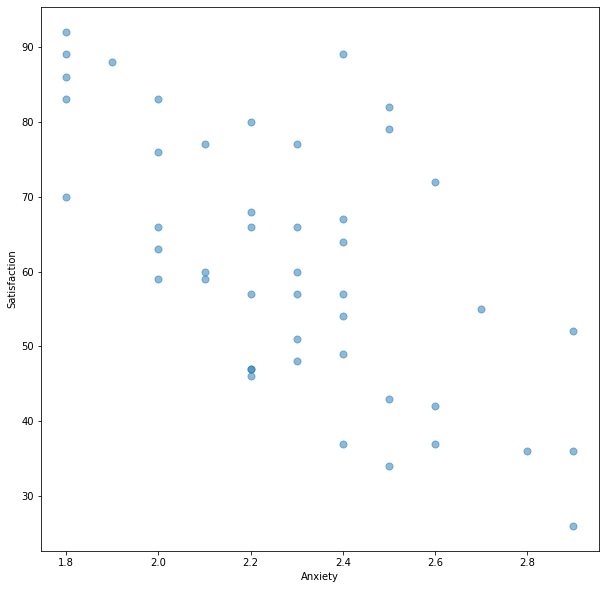

Correlation b/w Anxiety and Satisfaction = -0.6445909911548908


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
#Anxiety
plt.scatter(patient_info["Anxiety"],patient_info["Satisfaction"],s=50,alpha=0.5)
plt.xlabel("Anxiety")
plt.ylabel("Satisfaction")
plt.show()
print("Correlation b/w Anxiety and Satisfaction =",patient_info["Anxiety"].corr(patient_info["Satisfaction"]))

#### Plot: illness vs Satisfaction

It looks like illness annd Satisfaction seem to be negatively correlated with each other, in which one varible increases and the other decreases.
Correlation coefficient : -0.602

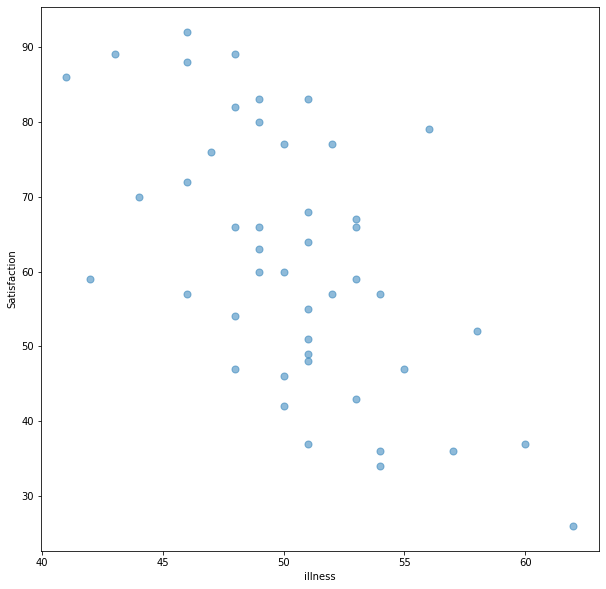

Correlation b/w Anxiety and Satisfaction = -0.6029417350881073


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
#illness
plt.scatter(patient_info["illness"],patient_info["Satisfaction"],s=50,alpha=0.5)
plt.xlabel("illness")
plt.ylabel("Satisfaction")
plt.show()
print("Correlation b/w Anxiety and Satisfaction =",patient_info["illness"].corr(patient_info["Satisfaction"]))

#### Normalising the data using minmaxscalar

The Anxiety values are in a smaller scale when compared to age and illness and hence i have normalised the data using MinMaxScalar.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

patient_info_normalized=patient_info.copy()
scalar=MinMaxScaler()
patient_info_normalized[[ "Age", "illness", "Anxiety"]]=scalar.fit_transform(patient_info_normalized[[ "Age", "illness", "Anxiety"]])
x_values=patient_info_normalized[[ "Age", "illness", "Anxiety"]]
y_values=patient_info_normalized["Satisfaction"]

#### Split the data into train and test

Split the original normalised data into a train and test data so that the test data can be used later for evaluation purposes.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.20,random_state=1)


# Question 2

### Divide this data into K=10 folds of training and testing sets. Using your own implementations of batch, stochastic and mini-batch gradient descent, fit a linear regression model using the training data. Generate plots of the training loss for each iteration and implementation. Experiment with different values for the learning rate and mini-batch size. Discuss how you selected the optimal values for the learning rate and mini-batch size. Display the final regression coeffcients for each implementation.

#### Batch Gradient Descent with hyperparameter tuning

Divided the train data into 10 folds using Kfold.
Generated the plots showing the training loss for each iteration.

Learning Rate: For choosing the optimal learning rate I chose to run over a loop with the learning rate ranging fom 0.1 to 1.0 in increments of 0.1 .
Each time the regression coefficients and the MSE is calculated with different learning rates.

The one with the minimum Mean Sqaured Error in that particular fold is considered and the corresponding learning rate is stored as a plausible minimum learning rate.

Finally, the one with the least Mean sqaured error over all the 10 folds is taken and the corresponding regression coefficients and the learning rate is chosen to be the optimal one.



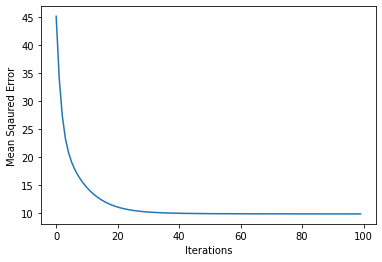

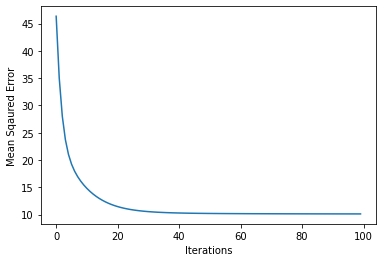

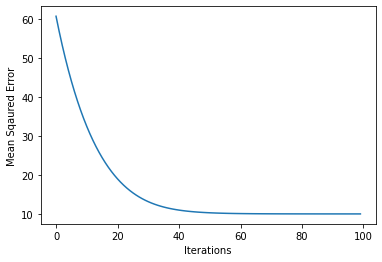

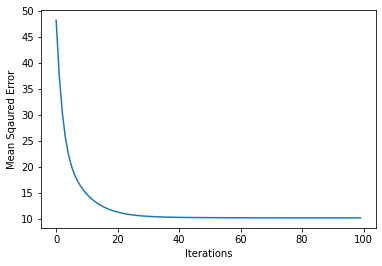

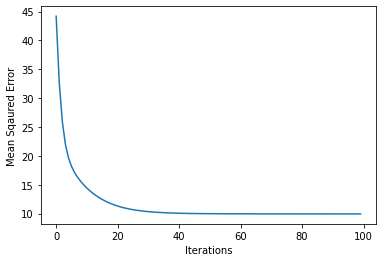

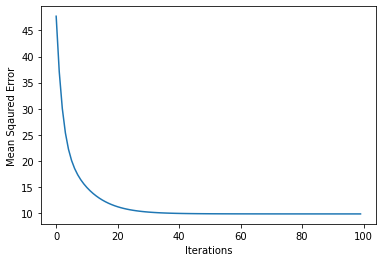

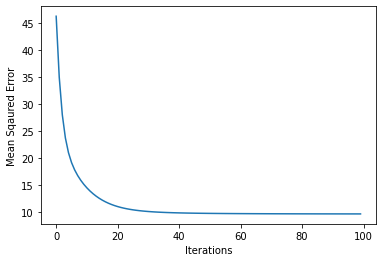

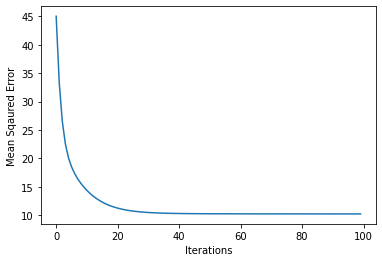

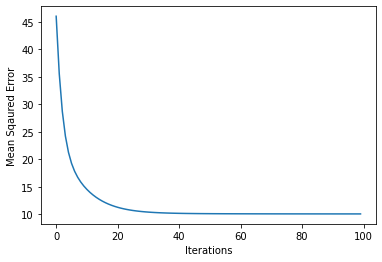

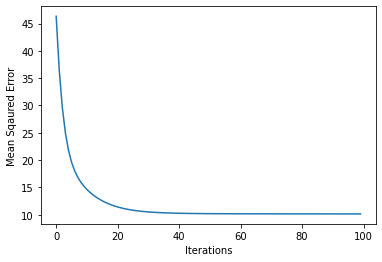

Final Regression coeffcients:  [ 92.1702226  -46.22785599 -10.92042474  -5.79432876] Mean Squared Error: 9.675730792103105 Optimal Learning Rate: 0.5


In [ ]:
from sklearn.model_selection import KFold
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

kf=KFold(n_splits=10,random_state=1,shuffle=True) 
n_interations=100
predict_minimum=np.inf

for train_index,test_index in kf.split(X_train["Age"]): #10 fold split
  train_x,train_y=X_train.iloc[train_index],y_train.iloc[train_index]
  test_x,test_y=X_train.iloc[test_index],y_train.iloc[test_index]
  m=len(train_index)
  train_x_b=np.c_[np.ones((m,1)),train_x]
  train_y_b=train_y
  min_mse=np.inf   #initially
  for eta in np.arange(0,1.0,0.1):     # loop through the different learning rates
    theta=np.random.random(4)          #initialise the theta to random values
    predict_values=[]
    for i in range(n_interations):
      gradients=(2/m)*train_x_b.T.dot(train_x_b.dot(theta)-train_y_b) #compute the gradient
      theta=theta - eta * gradients   #update theta values for each iteration
      y_predict=train_x_b.dot(theta)
      MSE_value=mean_squared_error(y_predict,train_y_b,squared=False) 
      predict_values.append(MSE_value)
    #check if the MSE computed is the least for this loop
    if (MSE_value<min_mse):
      min_mse,eta_loop=MSE_value,eta
      theta_final,predict_final=theta,predict_values
  #check if the minimum MSE computed for this loop is the least over the 10 folds
  if (min_mse<predict_minimum):
    predict_minimum=min_mse
    theta_fold_mininmum=theta_final
    eta_final=eta_loop
  #plot the training loss for each iteration
  plt.plot(np.arange(0,n_interations,1),predict_final)
  plt.xlabel("Iterations")
  plt.ylabel("Mean Sqaured Error")
  plt.show()
print("Final Regression coeffcients: ",theta_fold_mininmum,"Mean Squared Error:",predict_minimum,"Optimal Learning Rate:",eta_final)

#### Evaluating the model with the test data (Batch Gradient Descent)

In [ ]:
X_train_b=np.c_[np.ones((len(X_test),1)),X_test]
y_predict_1=X_train_b.dot(theta_fold_mininmum)
optimal_regression_coefficients_batch=mean_squared_error(y_test,y_predict_1,squared=False)
print("Optimal Regression Coefficients for Batch Gradient Descent =",theta_fold_mininmum)
print("MSE for Batch Gradient Descent =",optimal_regression_coefficients_batch)

Optimal Regression Coefficients for Batch Gradient Descent = [ 92.1702226  -46.22785599 -10.92042474  -5.79432876]
MSE for Batch Gradient Descent = 8.580172509607996


#### Stochastic Gradient Descent with hyperparameter tuning



Divided the train data into 10 folds using Kfold.
Generated the plots showing the training loss for each iteration.

Learning Rate: For choosing the optimal learning rate 
the hyperparameters here would be the h0 and the 

h1 values which influence the learning schedule. I chose to run over a loop with the h0 values raning from 50 to 200 in increments of 50 and h1 values ranging from 5 to 20 in increments of 5.

Each time the regression coefficients and the MSE is calculated with different learning rates.

The one with the minimum Mean Sqaured Error in that particular fold is considered and the corresponding h0 and h1 values are stored as a plausible minimum learning rate values.

Finally the one with the least Mean sqaured error over all the 10 folds is taken and the corresponding regression coefficients and the learning rate (h0 and h1) is chosen to be the optimal one.


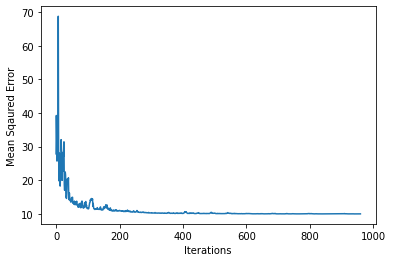

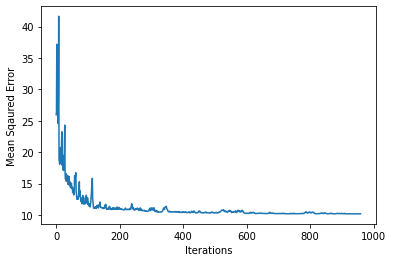

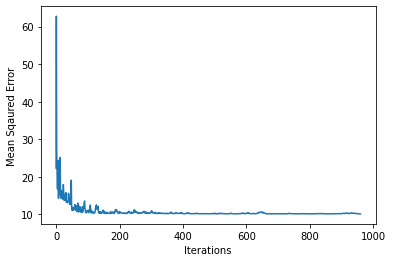

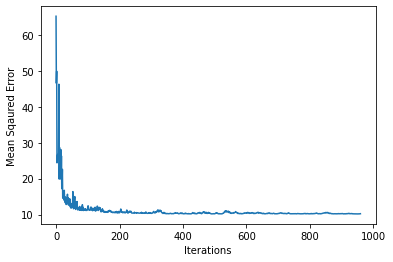

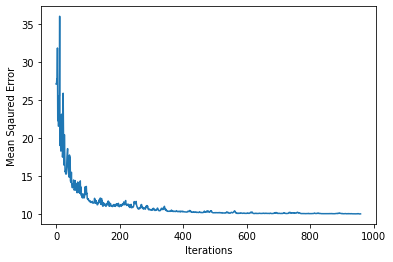

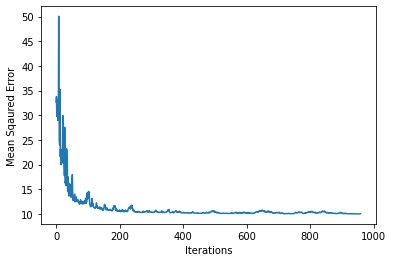

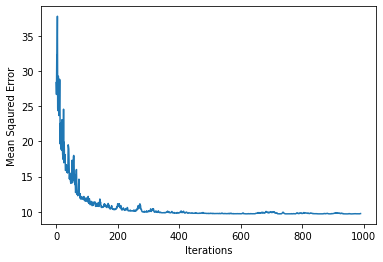

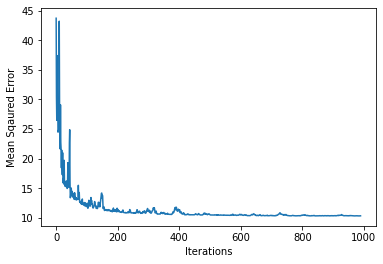

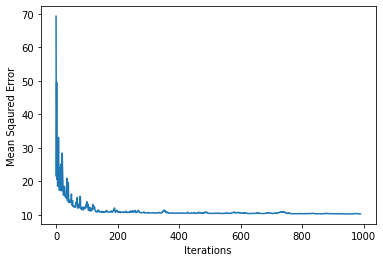

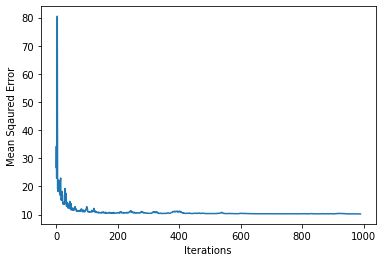

Final Regression coeffcients:  [ 90.51683614 -45.03671144 -12.27870902  -4.29964447] Mean Squared Error: 9.736456761528363 Optimal Learning Rate: 0.19821605550049554 Learning Schedule parameters: h0: 200 h1: 20


In [ ]:
from sklearn.model_selection import KFold
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error

kf=KFold(n_splits=10,random_state=1,shuffle=True)
n_epochs=30
predict_minimum=np.inf

def learning_schedule(t,t0,t1):  #t0 and t1 are the hyperparameters to control the learning rate
  return t0/(t+t1)

c=0
for train_index,test_index in kf.split(X_train["Age"]): #10 fold split
  train_x,train_y=X_train.iloc[train_index],y_train.iloc[train_index]
  test_x,test_y=X_train.iloc[test_index],y_train.iloc[test_index]
  m=len(train_index)
  train_x_b=np.c_[np.ones((m,1)),train_x]
  train_y_b=train_y
  min_mse=np.inf
  for h0 in [50,100,150,200]:  #h0 values  
    for h1 in [5,10,15,20]:    #h1 values 
      theta=np.random.random(4)
      loss_iterations=[]
      c=0
      for ep in range(n_epochs):
        for i in range(m):
          c+=1
          random_index=np.random.randint(m)
          xi=train_x_b[random_index:random_index+1]  #a random instance of the data is taken to compute the gradient
          yi=train_y_b[random_index:random_index+1]
          gradients=(2/m)*xi.T.dot(xi.dot(theta)-yi) #compute the gradient
          eta=learning_schedule((ep*m)+i,h0,h1)  #calculate the learning rate
          theta=theta-(eta*gradients)       #calculate the theta each iteration
          y_predict=train_x_b.dot(theta)
          MSE_value=mean_squared_error(y_predict,train_y_b,squared=False)
          loss_iterations.append(MSE_value)
      #check if the MSE computed is the least for this loop 
      if (MSE_value<min_mse):
        min_mse,eta_final=MSE_value,eta
        iteration_h0,iteration_h1=h0,h1
        theta_final,predict_final=theta,loss_iterations
  #check if the minimum MSE computed for this loop is the least over the 10 folds
  if (min_mse<predict_minimum):
    predict_minimum,theta_fold_mininmum=min_mse,theta_final
    final_h0,final_h1,final_eta=iteration_h0,iteration_h1,eta_final
    
  #plot the training loss for each iteration
  plt.plot(np.arange(0,c,1),predict_final)
  plt.xlabel("Iterations")
  plt.ylabel("Mean Sqaured Error")
  plt.show()
print("Final Regression coeffcients: ",theta_fold_mininmum,"Mean Squared Error:",predict_minimum,"Optimal Learning Rate:",final_eta,"Learning Schedule parameters:","h0:",final_h0,"h1:",final_h1)

#### Evaluating the model with the test data (Stochastic Gradient Descent)

In [ ]:
X_train_b=np.c_[np.ones((len(X_test),1)),X_test]
y_predict_1=X_train_b.dot(theta_fold_mininmum)
optimal_regression_coefficients_batch=mean_squared_error(y_test,y_predict_1,squared=False)
print("Optimal Regression Coefficients for Stochastic Gradient Descent =",theta_fold_mininmum)
print("MSE for Stochastic Gradient Descent =",optimal_regression_coefficients_batch)

Optimal Regression Coefficients for Stochastic Gradient Descent = [ 90.51683614 -45.03671144 -12.27870902  -4.29964447]
MSE for Stochastic Gradient Descent = 8.766185333706103


#### Mini Batch Gradient Descent with hyper parameter tuning

Divided the train data into 10 folds using Kfold.
Generated the plots showing the training loss for each iteration.

Learning Rate:
For choosing the optimal learning rate 
the hyperparameters here would be the h0 and h1 values which influence the learning schedule. I chose to run over a loop with the h0 values raning from 50 to 200 in increments of 50 and h1 values ranging from 5 to 20 in increments of 5.

Batch Size: 
I run a nested loop with the batch size which is one of the other hyperparameters with values ranging from 5 to 15 with increments of 5.

Each time the regression coefficients and the MSE is calculated with different learning rates and the batch size.

The one with the minimum Mean Sqaured Error in that particular fold is considered and the corresponding h0 and h1 values are stored as a plausible minimum learning rate values along with the minimum batch size.

Finally the one with the least Mean sqaured error over all the 10 folds is taken and the corresponding regression coefficients, the learning rate (h0 and h1) and the batch size is chosen to be the optimal one.

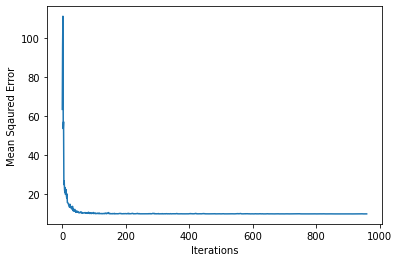

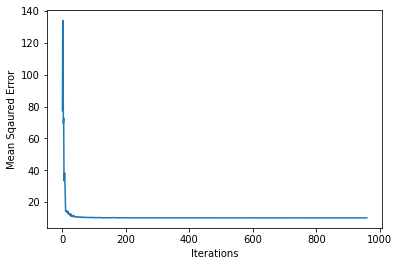

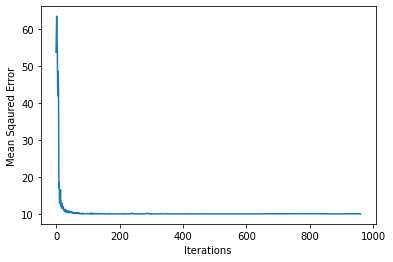

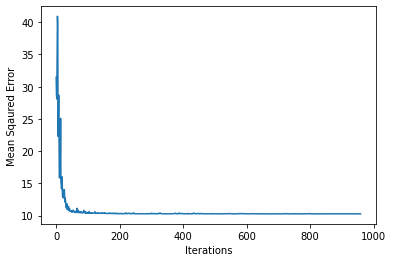

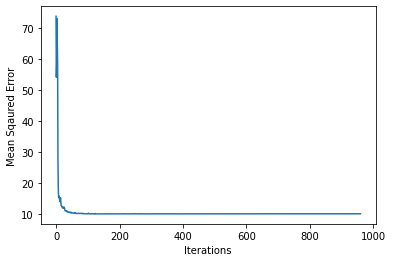

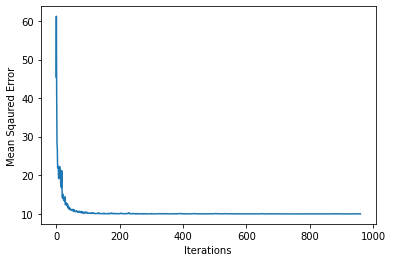

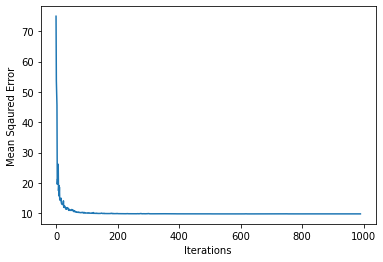

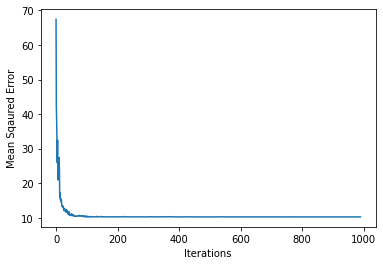

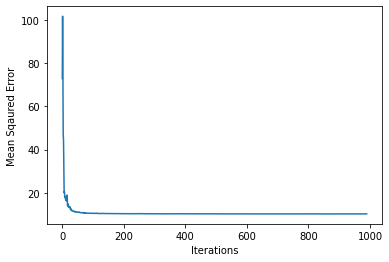

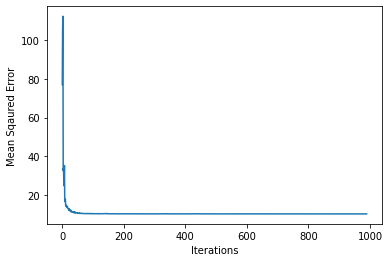

Final Regression coeffcients: [ 92.32311099 -45.50583684 -10.03063788  -6.98868242] Batch Size: 10 Mean Squared Error: 9.69757722428957 Optimal Learning Rate: 0.049554013875123884 Learning Schedule parameters: h0: 50 h1: 20


In [ ]:
from sklearn.model_selection import KFold
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error

kf=KFold(n_splits=10,random_state=1,shuffle=True)
n_epochs=30
predict_minimum=np.inf

def learning_schedule(t,t0,t1):  #t0 and t1 are the hyperparameters to control the learning rate
  return t0/(t+t1)
c=0

for train_index,test_index in kf.split(X_train["Age"]): #10 fold split
  train_x,train_y=X_train.iloc[train_index],y_train.iloc[train_index]
  test_x,test_y=X_train.iloc[test_index],y_train.iloc[test_index]
  m=len(train_index)
  train_x_b=np.c_[np.ones((m,1)),train_x]
  train_y_b=train_y
  min_mse=np.inf
  for h0 in [10,30,50]:
    for h1 in [5,20,35]:
      for batch_size in [5,10,15]:  #batch size parameter ranging from 5 to 15
        theta=np.random.random(4)
        loss_iterations=[]
        c=0
        for ep in range(n_epochs):
          for i in range(m):
            c+=1
            random_index=np.random.randint(m)
            xi=train_x_b[random_index:random_index+batch_size] # a batch of random samples taken to compute the Gradient 
            yi=train_y_b[random_index:random_index+batch_size]
            gradients=(2/m)*xi.T.dot(xi.dot(theta)-yi)
            eta=learning_schedule((ep*m)+i,h0,h1)   #compute the learning rate
            theta=theta-(eta*gradients)             #compute theta for each iteration  
            y_predict=train_x_b.dot(theta)
            MSE_value=mean_squared_error(y_predict,train_y_b,squared=False)
            loss_iterations.append(MSE_value)
        #check if the MSE computed is the least for this loop 
        if (MSE_value<min_mse):
          min_mse,eta_final=MSE_value,eta
          iteration_h0,iteration_h1=h0,h1
          iteration_batch_size,theta_final,predict_final=batch_size,theta,loss_iterations

  #check if the minimum MSE computed for this loop is the least over the 10 folds
  if (min_mse<predict_minimum):
    predict_minimum,theta_fold_mininmum=min_mse,theta_final
    final_batch_size,final_h0,final_h1,final_eta=iteration_batch_size,iteration_h0,iteration_h1,eta_final
  #plot the training loss for each iteration
  plt.plot(np.arange(0,c,1),loss_iterations)
  plt.xlabel("Iterations")
  plt.ylabel("Mean Sqaured Error")
  plt.show()
print("Final Regression coeffcients:",theta_fold_mininmum,"Batch Size:",final_batch_size,"Mean Squared Error:",predict_minimum,"Optimal Learning Rate:",final_eta,"Learning Schedule parameters:","h0:",final_h0,"h1:",final_h1)

#### Evaluating the model with the test data (Mini Batch Gradient Descent)

In [ ]:
X_train_b=np.c_[np.ones((len(X_test),1)),X_test]
y_predict_1=X_train_b.dot(theta_fold_mininmum)
optimal_regression_coefficients_batch=mean_squared_error(y_test,y_predict_1,squared=False)
print("Optimal Regression Coefficients for Stochastic Gradient Descent =",theta_fold_mininmum)
print("MSE for Stochastic Gradient Descent =",optimal_regression_coefficients_batch)

Optimal Regression Coefficients for Stochastic Gradient Descent = [ 92.32311099 -45.50583684 -10.03063788  -6.98868242]
MSE for Stochastic Gradient Descent = 8.436647819560594


#### How the optimal learning rate and the mini batch size was chosen:
For choosing the optimal values of the learning rate and the mini batch size for the models I used a for loop to iterate over a possible range of values and then choose the best combination which gave the least Mean Sqaured Error. This is similar to how the Grid SearchCV works internally, where it checks the model with the different combinations of the hyperparameters and gives the best combination of them which results in the least errors.

# Question 3

### Once trained, use the testing data and mean-square error to evaluate performance. Which approach performed best? Why?

As computed in the above cells:
I got these values of MSE on the test data for the different approaces:


Batch Gradient Descent : 8.580172509607996

Stochastic Gradient Descent : 8.766185333706103

Mini Batch Gradient Descent : 8.436647819560594


From the above values we can say that the mini batch gradient descent performs slightly better than the other two. In this case as it takes into consideration the random mini batches of the dataset to determine the regression coeffecients.

A randomly sampled minibatch may reflect the true data generating distribution better than the original full batch.
If certain iterations of the minibatch gradient updates provide a better estimate, the average result of one epoch may be better than the gradient computed from the entire batch.

Another drawback in the case of a full batch gradient descent is that it is not computationally feasible if we have a large dataset.

The Stochastic Gradient descent on the other hand computes the gradient descent using a single random sample from the dataset and in this case as you can see from the graph plotted, the gradient computed may not tend to always descent towards the minima as some samples may be very noisy.

Hence the Mini batch Gradient descent performs better than SGD.